In [239]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
import seaborn as sns

In [240]:
# Select just a few of these categories, and download the training and testing set.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [241]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [242]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

In [243]:
for i in range(0,4):
    print('%s: %d' % (train.target_names[i], i))

comp.os.ms-windows.misc: 0
comp.windows.x: 1
misc.forsale: 2
rec.autos: 3


In [244]:
print(classification_report(test.target, labels) )

              precision    recall  f1-score   support

           0       0.71      0.01      0.02       394
           1       0.54      0.97      0.69       395
           2       0.92      0.89      0.91       390
           3       0.81      0.98      0.89       396

   micro avg       0.71      0.71      0.71      1575
   macro avg       0.75      0.71      0.63      1575
weighted avg       0.75      0.71      0.63      1575



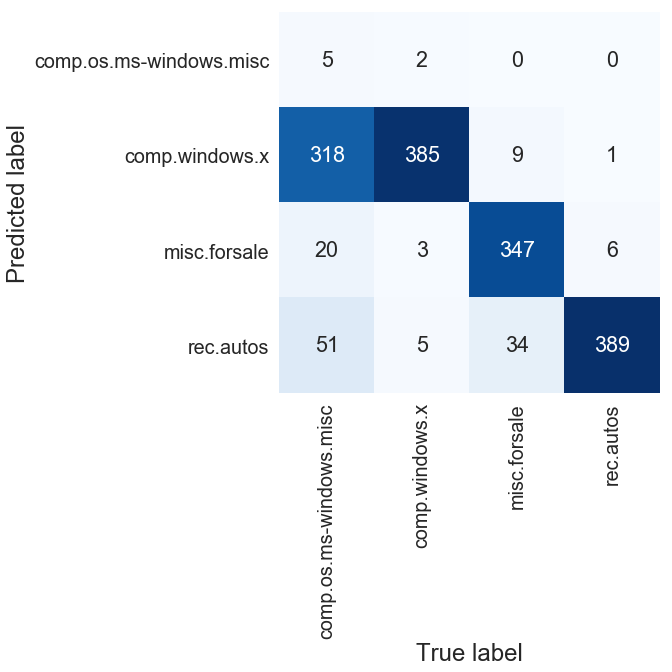

In [245]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [246]:
import numpy as np

class_cnt = np.zeros((4))
for i in range(0,len(train.target)):
    class_cnt[train.target[i]]=class_cnt[train.target[i]]+1

for i in range(0,4):
    print('%s: %d' % (train.target_names[i], class_cnt[i]))

comp.os.ms-windows.misc: 591
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594


In [257]:
cnt = 0
classnum = 2
print(train.target_names[classnum])
for i in range(0,len(test.target)):
    if(test.target[i]==classnum):
        label = model.predict([test.data[i]])
        if(label[0] == 3):
            if(cnt < 1):
                print(test.data[i])
            cnt = cnt + 1
print(cnt)

misc.forsale
From: daspaz@stein.u.washington.edu (The Spaz)
Subject: one way Omaha --> Seattle plane ticket 5/9 *female*
Keywords: ticket, Omaha, Nebraska
Article-I.D.: shelley.1radovINNfks
Organization: University of Washington
Lines: 7
NNTP-Posting-Host: stein.u.washington.edu

One way Omaha to Seattle
ticket in my name [Jessamyn West]
for travel 5/9. Must be picked up at Omaha airport [or thereabouts]
on 5/6. Continental Airlines. Make me an offer.

reply to JWEST@hamp.hampshire.edu
        

34


In [234]:
# Calculate accuracy of class predictions.
metrics.accuracy_score(test.target, labels)

0.714920634920635

In [235]:
model.score(train.data, train.target)

0.7879813796022006

In [236]:
model.score(test.data, test.target)

0.714920634920635

In [237]:
prob = model.predict_proba(test.data)[:, 1]
print(prob)

[1.00000000e+00 1.00000000e+00 8.82921391e-27 ... 9.82151381e-26
 2.69680478e-34 9.99991931e-01]


In [238]:
class Object(object):
    pass

train_aux = Object()
train_aux.data = []
train_aux.target = []
train_aux.filenames =[]
train_aux.target_names =[]
cnt = 0
for i in range(0,len(train.target)):
    if(train.target[i]==0 and cnt < 300):
        train_aux.data.append(train.data[i])
        train_aux.target.append(train.target[i])
        train_aux.filenames.append(train.filenames[i])
        cnt = cnt + 1
    elif(train.target[i]!=0):
        train_aux.data.append(train.data[i])
        train_aux.target.append(train.target[i])
        train_aux.filenames.append(train.filenames[i])

train_aux.target_names = train.target_names
train = train_aux

print(cnt)

300


In [210]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [211]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

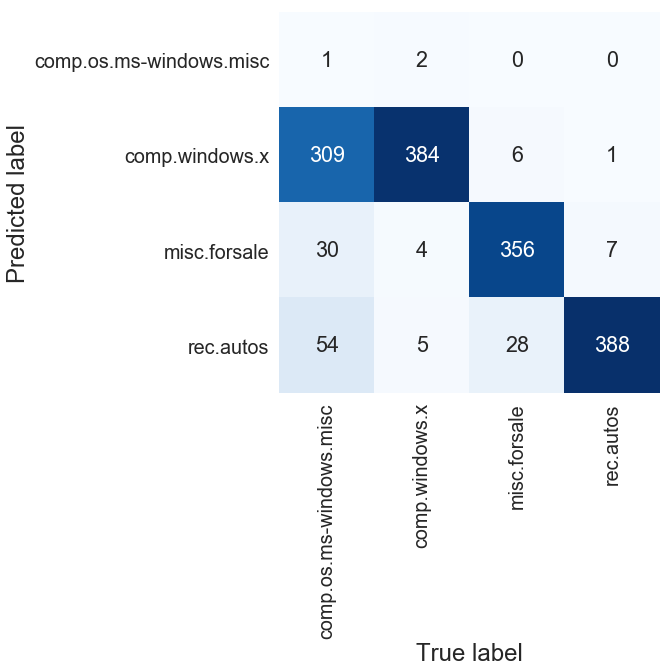

In [212]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

In [213]:
import numpy as np

class_cnt = np.zeros((4))
for i in range(0,len(train.target)):
    class_cnt[train.target[i]]=class_cnt[train.target[i]]+1

for i in range(0,4):
    print('%s: %d' % (train.target_names[i], class_cnt[i]))

comp.os.ms-windows.misc: 300
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594
